# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 6</center>

# <center>Linear Regression for Supervised Learning</center>

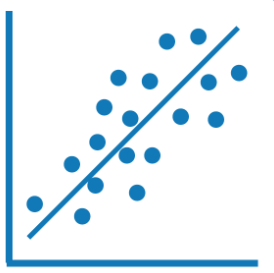

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading Data </li>
<li> Creating Simple Linear Model</li>
<li> Explore Linear Model attributes</li>
<li> Find MSE </li>
<li> Make Predictions for simple linear model</li>
<li> Create Multiple Linear Model </li>
<li> Make Predictions for multiple linear model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use sklearn library to create first machine learning model and implement sklearn LinearRegression model for both univariate and mulitple features.

By the end of the lab, you should be able to :
- Load required dataset and library for training machine learning model


- Implement sklearn LinearRegression algorithm for simple linear model as well as multiple linear model.


- Find MSE for the created model


- Make prediction for unseen data

## <font color = blue>1. Loading Data

    - Load boston housing data from sklearn.datasets module. Create dataframe from the boston data.

In [63]:
#solution
from sklearn.datasets import load_boston
boston =load_boston()
boston.keys()

C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [64]:
import pandas as pd
df =pd.DataFrame(boston.data, columns =boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [65]:
df['target'] = boston.target
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [66]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

## <font color = blue>2. Creating simple Linear Model

INSTRUCTIONS:-
    
- The boston dataset contain many features. To implement simple linear regression model, let us choose any one feature that is mostly related to the target feature. 
    
    
- Use dataframe `corr()` method to check correlation between each features with target feature. Use heatmap to display the correlation.
    
    
- Which feature is mostly related to the target feature? Choose that feature to create linear Model.
    
    
- Import `LinearRegression()` from sklearn `linear_model` module. Create LinearRegression() object and fit the dataset to train the model


In [67]:
df.shape

(506, 14)

In [68]:
#Solution
#creating correletion between different feature and target
df.corr()


CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
target  -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT    target  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
target   0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

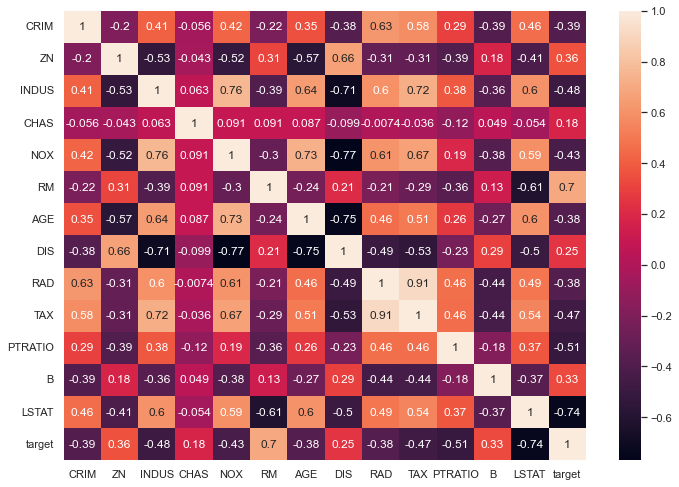

In [69]:
import seaborn as sns
data =df.corr()
sns.heatmap(data, annot =True)
#to make the figure big
sns.set(rc ={'figure.figsize':(11.7,8.27)})

In [70]:
#create linear model
from sklearn.linear_model import LinearRegression

#when we use class we need to create object
model= LinearRegression()
#to fed the model we need x and y value
x =df.RM
y =df.target
#train the model we need to call object
model.fit(x,y)


ValueError: Expected 2D array, got 1D array instead:
array=[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 6.51  6.25  7.489 7.802 8.375 5.854 6.101 7.929 5.877
 6.319 6.402 5.875 5.88  5.572 6.416 5.859 6.546 6.02  6.315 6.86  6.98
 7.765 6.144 7.155 6.563 5.604 6.153 7.831 6.782 6.556 7.185 6.951 6.739
 7.178 6.8   6.604 7.875 7.287 7.107 7.274 6.975 7.135 6.162 7.61  7.853
 8.034 5.891 6.326 5.783 6.064 5.344 5.96  5.404 5.807 6.375 5.412 6.182
 5.888 6.642 5.951 6.373 6.951 6.164 6.879 6.618 8.266 8.725 8.04  7.163
 7.686 6.552 5.981 7.412 8.337 8.247 6.726 6.086 6.631 7.358 6.481 6.606
 6.897 6.095 6.358 6.393 5.593 5.605 6.108 6.226 6.433 6.718 6.487 6.438
 6.957 8.259 6.108 5.876 7.454 8.704 7.333 6.842 7.203 7.52  8.398 7.327
 7.206 5.56  7.014 8.297 7.47  5.92  5.856 6.24  6.538 7.691 6.758 6.854
 7.267 6.826 6.482 6.812 7.82  6.968 7.645 7.923 7.088 6.453 6.23  6.209
 6.315 6.565 6.861 7.148 6.63  6.127 6.009 6.678 6.549 5.79  6.345 7.041
 6.871 6.59  6.495 6.982 7.236 6.616 7.42  6.849 6.635 5.972 4.973 6.122
 6.023 6.266 6.567 5.705 5.914 5.782 6.382 6.113 6.426 6.376 6.041 5.708
 6.415 6.431 6.312 6.083 5.868 6.333 6.144 5.706 6.031 6.316 6.31  6.037
 5.869 5.895 6.059 5.985 5.968 7.241 6.54  6.696 6.874 6.014 5.898 6.516
 6.635 6.939 6.49  6.579 5.884 6.728 5.663 5.936 6.212 6.395 6.127 6.112
 6.398 6.251 5.362 5.803 8.78  3.561 4.963 3.863 4.97  6.683 7.016 6.216
 5.875 4.906 4.138 7.313 6.649 6.794 6.38  6.223 6.968 6.545 5.536 5.52
 4.368 5.277 4.652 5.    4.88  5.39  5.713 6.051 5.036 6.193 5.887 6.471
 6.405 5.747 5.453 5.852 5.987 6.343 6.404 5.349 5.531 5.683 4.138 5.608
 5.617 6.852 5.757 6.657 4.628 5.155 4.519 6.434 6.782 5.304 5.957 6.824
 6.411 6.006 5.648 6.103 5.565 5.896 5.837 6.202 6.193 6.38  6.348 6.833
 6.425 6.436 6.208 6.629 6.461 6.152 5.935 5.627 5.818 6.406 6.219 6.485
 5.854 6.459 6.341 6.251 6.185 6.417 6.749 6.655 6.297 7.393 6.728 6.525
 5.976 5.936 6.301 6.081 6.701 6.376 6.317 6.513 6.209 5.759 5.952 6.003
 5.926 5.713 6.167 6.229 6.437 6.98  5.427 6.162 6.484 5.304 6.185 6.229
 6.242 6.75  7.061 5.762 5.871 6.312 6.114 5.905 5.454 5.414 5.093 5.983
 5.983 5.707 5.926 5.67  5.39  5.794 6.019 5.569 6.027 6.593 6.12  6.976
 6.794 6.03 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

LinearRegression()

In [72]:
#create linear model
from sklearn.linear_model import LinearRegression

#when we use class we need to create object
model= LinearRegression()
#to fed the model we need x and y value
x =df[['RM']]
y =df.target
#train the model we need to call object
model.fit(x,y)

LinearRegression()

## <font color = blue>3. Explore Linear Model attributes


In [73]:
#use coef_ attributes to get weights. We have only one weights since it is simple linear model
#this is our w
model.coef_



array([9.10210898])

In [74]:
#use intercept_ attributes to get the bias value
model.intercept_



-34.67062077643857

In [75]:
y_pred =model.coef_*6.575+model.intercept_
y_pred

array([25.17574577])

model.predict([[6.575]])

## <font color = blue>4. Find MSE
- sklearn provides `mean_squared_error()` method to check MSE for a given model. `mean_squared_error()` expect y_prediction and actual y value as its paramters. use linear model's `predict()` method to get y_prediction.
    
 `sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)`

In [76]:
#creating y_pred

from sklearn.metrics import mean_squared_error
y_pred =model.predict(df[['RM']])

MSE = mean_squared_error(y_pred,y)
MSE


43.60055177116956

71.70649130860212

## <font color = blue>5. Make Predictions


In [78]:
#Use predict method to make prediction to unseen data
# rm room
# not for 2 feature but to find for 2 value
#expec in 2d format
x_sample =[[6],[7]]
model.predict(x_sample)

C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.94203311, 29.04414209])

In [79]:
x_sample =[[6]]
model.predict(x_sample)

C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.94203311])

## <font color = blue>6. Create Multiple Linear Regression Model

- Explore the Multiple Linear regression model choosing any number of features you are comfortable with. Remember you can use the same LinearRegression() algorithm.

In [82]:
# new create linear model
from sklearn.linear_model import LinearRegression

#when we use class we need to create object
new_model= LinearRegression()
#to fed the model we need x and y value
new_x =df[['RM','DIS','RAD']]
new_y =df.target
#train the model we need to call object
new_model.fit(new_x,new_y)

LinearRegression()

In [83]:
#new creating y_pred
from sklearn.metrics import mean_squared_error
newy_pred =new_model.predict(df[['RM','DIS','RAD']])
newy_pred
MSE = mean_squared_error(newy_pred,y)
MSE

38.69240461300159

## <font color = blue>7. Make Prediction for Multi linear Model


In [89]:
#Solution

newx_sample =[[6,5,3],[7,4,3],[2,3,4]]
new_model.predict(newx_sample)

C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 21.82728204,  30.28396605, -12.11766098])

# TODO/HOMEWORK : Creating Linear Model
- Create multiple Linear Regression model with the same features you chose in subtask 6 above. Use any feature scaling techniques to scale the features and train the model. 


- Explore the difference in the result when using unscaled and scaled features.

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range =(0,1))
numeric =scaler.fit_transform(df)
numeric
result =pd.DataFrame(numeric,columns =df.columns)
result.head()

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        RAD       TAX   PTRATIO         B     LSTAT    target  
0  0.000000  0.208015  0.287234  1.000000  0.089680  0.422222  
1  0.043478  0.104962  0.553191  1.000000  0.204470  0.368889  
2  0.043478  0.104962  0.553191  0.989737  0.063466  0.660000  
3  0.086957  0.066794  0.648936  0.994276  0.033389  0.631111  
4  0.086957  0.066794  0.648936  1.000000  0.099338  0.693333

In [95]:
# new create linear model
from sklearn.linear_model import LinearRegression

#when we use class we need to create object
new_model= LinearRegression()
#to fed the model we need x and y value
new_x =result[['RM','DIS','RAD']]
new_y =result.target
#train the model we need to call object
new_model.fit(new_x,new_y)

LinearRegression()

In [97]:
#new creating y_pred
from sklearn.metrics import mean_squared_error
newy_pred =new_model.predict(result[['RM','DIS','RAD']])
newy_pred
MSE = mean_squared_error(newy_pred,new_y)
MSE

0.019107360302716835